In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import re
import string
import cv2
import warnings
warnings.filterwarnings("ignore")
from keras.utils import to_categorical
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Bidirectional
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import array_to_img
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, GlobalMaxPooling1D, MaxPool2D, SimpleRNN, Flatten, BatchNormalization, Conv2D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [82]:
#Task 1
qs_csv = pd.read_csv("/home/kali/Desktop/data1.csv")
qs_csv_float  = qs_csv.drop(columns=['City', 'Country', 'Name'], axis=1) #Only float left
print(qs_csv_float.columns)
qs_csv_float.head()

Index(['Year', 'Rank', 'Point'], dtype='object')


,Year,Rank,Point
0,2018,1,97.7
1,2018,2,94.6
2,2018,2,94.6
3,2018,4,92.5
4,2018,5,92.1


In [83]:
x = qs_csv_float.drop(['Year'], axis=1)
y = qs_csv_float['Year']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
print(x_train.shape)
print(y_train.shape)

(3675, 2)
(3675,)


In [84]:
model = Sequential()
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.add(layers.Flatten())
model.build(input_shape=(None, 2)) 

In [85]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 32)                96        
                                                                 
 dense_29 (Dense)            (None, 32)                1056      
                                                                 
 dense_30 (Dense)            (None, 1)                 33        
                                                                 
 flatten_1 (Flatten)         (None, 1)                 0         
                                                                 
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
92/92 [==============================] - 2s 7ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/10
92/92 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/10
92/92 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/10
92/92 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/10
92/92 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/10
92/92 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/10
92/92 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 

In [87]:
y_prediction = model.predict(x_test) > 0.5
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))
#The result is very similar with my SVM result. I guess, this is due the problem of dataset, where we have only
#shape = 2 in training

50/50 [==============================] - 0s 2ms/step
[[  0   0   0   0   0   0]
 [ 96   0   0   0   0   0]
 [201   0   0   0   0   0]
 [319   0   0   0   0   0]
 [435   0   0   0   0   0]
 [524   0   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
        2018       0.00      0.00      0.00      96.0
        2019       0.00      0.00      0.00     201.0
        2020       0.00      0.00      0.00     319.0
        2021       0.00      0.00      0.00     435.0
        2022       0.00      0.00      0.00     524.0

    accuracy                           0.00    1575.0
   macro avg       0.00      0.00      0.00    1575.0
weighted avg       0.00      0.00      0.00    1575.0



In [2]:
#task 2
#connecting our folders with images
classes = ['cats','dogs','flowers']
images_array = []
images_names = []
classes_array = []
class_id = 0
for folder in classes:
    for imagename in os.listdir(folder):
        image_sample = load_img(os.path.join(folder,imagename),target_size=(300,300))
        image_sample = img_to_array(image_sample)
        images_array.append(image_sample)
        classes_array.append(class_id)
        images_names.append(imagename)
    class_id+=1  
images_array = np.array(images_array)    
image_data = {"class": classes_array, "array": images_names}
image_data = pd.DataFrame(image_data)
image_data


,class,array
0,0,cat.157.jpg
1,0,cat.47.jpg
2,0,cat.64.jpg
3,0,cat.36.jpg
4,0,cat.156.jpg
...,...,...
609,2,0062.png
610,2,0140.png
611,2,0159.png
612,2,0209.png


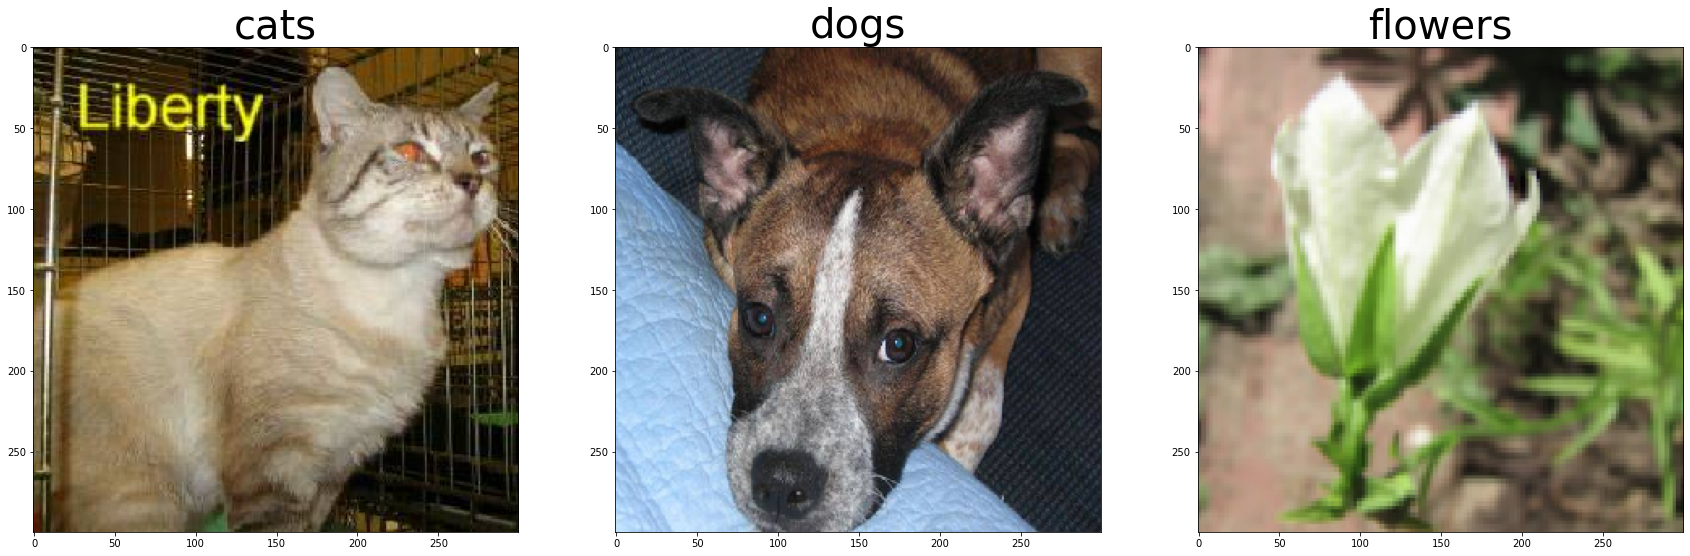

In [3]:
figure = plt.figure(figsize=(40,40))
for i in range(len(classes)):
    figures = figure.add_subplot(1,4,i+1)
    figures.set_title(classes[i], fontsize=40)
    image = array_to_img(images_array[204*i])
    plt.imshow(image)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(images_array, image_data['class'], test_size=0.30)
y_train = np.asarray(y_train).astype(np.int32)
y_test = np.asarray(y_test).astype(np.int32)
y_train = tf.one_hot(y_train, 4)
y_test = tf.one_hot(y_test, 4)


In [5]:
#model building
alpha = 0.02
model = keras.Sequential()
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(300,300,3)))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.Dense(4, activation="softmax"))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 300, 300, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                    

In [6]:
#I wanted epochs=50 as in example, but my kernel is going to be dead :(
model.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose = 1)

Epoch 1/10
11/11 [==============================] - 17s 1s/step - loss: 1128.1688 - accuracy: 0.3207 - val_loss: 164.2319 - val_accuracy: 0.3837
Epoch 2/10
11/11 [==============================] - 14s 1s/step - loss: 96.4044 - accuracy: 0.4577 - val_loss: 52.7519 - val_accuracy: 0.4186
Epoch 3/10
11/11 [==============================] - 14s 1s/step - loss: 37.5389 - accuracy: 0.5277 - val_loss: 28.6957 - val_accuracy: 0.4419
Epoch 4/10
11/11 [==============================] - 15s 1s/step - loss: 14.3678 - accuracy: 0.6210 - val_loss: 14.9853 - val_accuracy: 0.4767
Epoch 5/10
11/11 [==============================] - 14s 1s/step - loss: 4.1293 - accuracy: 0.7580 - val_loss: 6.8219 - val_accuracy: 0.5930
Epoch 6/10
11/11 [==============================] - 14s 1s/step - loss: 2.0008 - accuracy: 0.8134 - val_loss: 6.5990 - val_accuracy: 0.5930
Epoch 7/10
11/11 [==============================] - 14s 1s/step - loss: 0.8990 - accuracy: 0.8688 - val_loss: 3.8418 - val_accuracy: 0.5814
Epoch 8/1

In [7]:
score = model.evaluate(x_train, y_train, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.6609879732131958
Test accuracy: 0.9254079461097717


In [12]:
#task 3
text_data = pd.read_csv("/home/kali/Downloads/tripadvisor_hotel_reviews.csv", names=['Review', 'Rating'], header=0, encoding='utf-8')
text_data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [32]:
length = list(map(len, text_data.Review.values))
print('max_length:',np.max(length))
print('min_length:',np.min(length))
print('mean_size:',np.mean(length))
print('median_size:',np.median(length))
text_data.Rating.value_counts()

max_length: 13501
min_length: 44
mean_size: 724.896832755844
median_size: 537.0


5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [58]:
dict_length = 1000
input_length = 44
tokenizer = Tokenizer(num_words=dict_length)
tokenizer.fit_on_texts(text_data.Review.values)
post_seq = tokenizer.texts_to_sequences(text_data.Review.values)
post_seq_padded = pad_sequences(post_seq, maxlen=input_length)

In [70]:
x_first = post_seq_padded
x_first = np.array(x_first)
y_first = text_data['Rating'].values
y_first = np.array(y_first)
x, y = shuffle(x_first, y_first, random_state=23)
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.3, random_state=23)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=23)

In [71]:
model = Sequential()
model.add(Embedding(dictionary_length, 2, input_length=input_length))
model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Bidirectional(SimpleRNN(16, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(16, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(16, return_sequences=False)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 44, 2)             2000      
                                                                 
 dense_25 (Dense)            (None, 44, 32)            96        
                                                                 
 dense_26 (Dense)            (None, 44, 32)            1056      
                                                                 
 bidirectional_21 (Bidirecti  (None, 44, 32)           1568      
 onal)                                                           
                                                                 
 bidirectional_22 (Bidirecti  (None, 44, 32)           1568      
 onal)                                                           
                                                                 
 bidirectional_23 (Bidirecti  (None, 32)              

In [72]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x=x_train, y=y_train, batch_size=256, verbose=1, epochs=5, validation_data=(x_validation, y_validation))

Epoch 1/5
45/45 [==============================] - 12s 97ms/step - loss: -11.2065 - accuracy: 0.0676 - val_loss: -18.4517 - val_accuracy: 0.0711
Epoch 2/5
45/45 [==============================] - 3s 72ms/step - loss: -22.2939 - accuracy: 0.0687 - val_loss: -25.7024 - val_accuracy: 0.0711
Epoch 3/5
45/45 [==============================] - 3s 72ms/step - loss: -28.3921 - accuracy: 0.0687 - val_loss: -31.2307 - val_accuracy: 0.0711
Epoch 4/5
45/45 [==============================] - 3s 73ms/step - loss: -33.6649 - accuracy: 0.0687 - val_loss: -36.2982 - val_accuracy: 0.0711
Epoch 5/5
45/45 [==============================] - 3s 74ms/step - loss: -38.6065 - accuracy: 0.0687 - val_loss: -41.1465 - val_accuracy: 0.0711


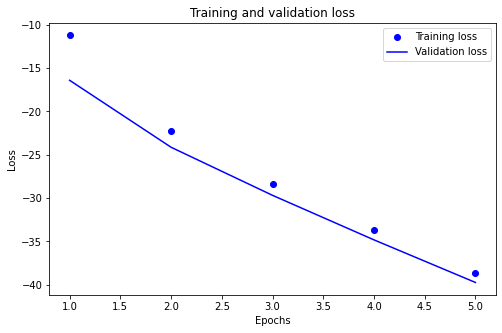

In [90]:
history_dictionary = history.history
loss = history_dictionary['loss']
validation_loss = history_dictionary['val_loss']
plt.figure(figsize=(8,5))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, value_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [81]:
score = model.evaluate(x_train, y_train, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: -41.07556915283203
Test accuracy: 0.06867700815200806
